# Randomly Radioactive

A sample 73 project by Chammika Udalagama.

Updated: 2022-02-19

## Introduction & Setup

In this project, we will use **random numbers** generated by a computer to understand the phenomenon of **Radioactive Decay**. In particular, we will see how a random processes can lead to a situation that can be described by a deterministic equation! 

We will briefly review random numbers on a computers, followed by a quick introduction to radioactive decay.

### Python packages

Let's start by loading all the packages we will need for this project right now so as not to clutter our code with import commands.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

#----------------- Some matplotlib customisations ----------------#

plt.style.use('fivethirtyeight')

# rcParam below holds all the default settings for
# matplotlib plots. We can change the style of ALL
# plots by modifying rcParam

plt.rcParams["figure.figsize"] = (12, 6)                          # Set the figsize of ALL my plots
plt.rcParams["axes.labelcolor"] = '#b2182b'
plt.rcParams["axes.titlecolor"] = '#b2182b'


#------------------- Some constants we will need -----------------#
s_to_ns = 1.E9
ns_to_s = 1.E-9

polonium_decay_constant_in_per_s = 2.28E6
polonium_half_life_ns = 304

## Random Numbers

**Random numbers** are extremely important in many fields ranging from cryptography, lotteries to science and technology. For example, random numbers are routinely used to encrypt information on the internet. Random numbers are also heavily used in science for various simulations. 
 
### Real and Pseudo Random Numbers
A device that provides random numbers is called a **random number generator** (RNG). Real random number generators use random physical processes (e.g. radioactivity or noise in circuits) to generate random numbers. However, some algorithms can produce a stream of numbers that approximate real random numbers. Because a deterministic algorithm generates these numbers, one can argue that these RNG are not 'truly' random. So we call them **pseudo RNG** (PRNG). 

Every time we use a PRNG, it gives a new number. We can thereby produce a list of random numbers. One of the features of PRNG is that the numbers begin to repeat. However,  modern PRNG algorithms are so sophisticated that it takes (for a PRNG called the Mersenne Twister) about $10^{19937}-1$  times before the numbers repeat. This is good enough for most simulations.

Typical PRNG produce **uniformly distributed** numbers between 0 and 1. Let's try to see what this means using `numpy`.

In [2]:
import numpy as np

In [3]:
np.random.rand()                # Give one number

0.8340788421510162

In [4]:
np.random.rand(10)              # Give ten numbers`

array([0.82088369, 0.57387682, 0.47157772, 0.69227838, 0.4636349 ,
       0.4947531 , 0.86947408, 0.36212354, 0.26493224, 0.23600415])

Notice that:
- All the numbers are between 0 and 1. 
- The numbers are (more or less) evenly (i.e. uniformly) distributed to cover the interval between 0 and 1. 

One way to see the last point is to generate a large set of numbers and check if the percentages of numbers match, as follow:

In [5]:
n = 10000
random_numbers = np.random.rand(n)

In [6]:
                                                 # sum() adds taking TRUE as 1 and FALSE as 0  
np.sum(random_numbers < .5)/n*100                # The numbers less than .5 must be about 50%

50.3

In [7]:
np.sum(random_numbers < .25)/n*100               # The numbers less than .25 must be about 25%

24.83

In [8]:
np.sum(random_numbers > .75)/n*100               # The numbers more than .75 must be about 25%

24.89

Alternatively, we can convince ourselves of the uniformity by plotting the numbers as follow:
- One could be a histogram. You will then see that the bins are uniformly filled across the range [0,1).
- Another could be a scatter plot. You will then see the numbers uniformly covering the interval between [0,1) 

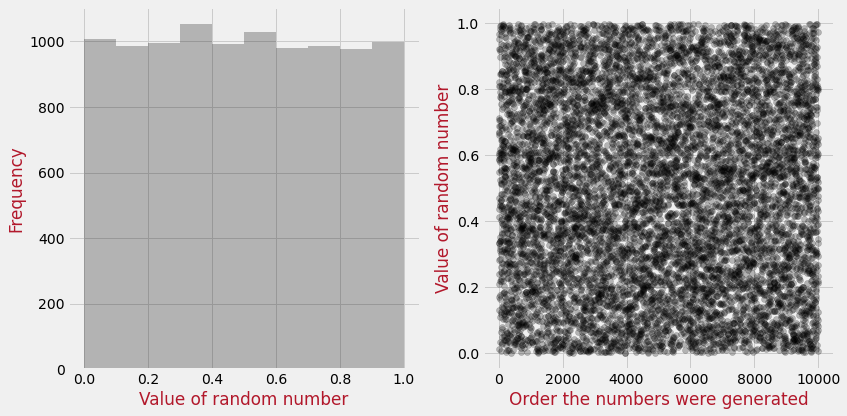

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, color="k", alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, color="k", alpha=.25)
axis.set_xlabel("Order the numbers were generated")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()

### 'seeding' a PRNG

Sometimes, when setting up our code, we might like to generate the **same** set of numbers. You can achieve this by specifying a **seed**, which is the integer number that 'kicks off' the PRNG algorithm. You do not usually have to seed the PRNG. Instead, it does it automatically by using 'some' number  (e.g. the number of milliseconds since January 1970) internally.

In [10]:
np.random.randint(0, 100, 10)                              # Ten integers between 0 and 100

array([18, 53, 46, 42, 69, 44, 12,  1, 27, 32])

In [11]:
np.random.randint(0, 100, 10)                              # Another ten integers between 0 and 100

array([99, 31, 54,  8, 45, 15, 47, 44, 23, 95])

In [12]:
np.random.seed(1234)                                       # Specifying a seed
np.random.randint(0, 100, 10)                              # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [13]:
np.random.seed(1234)
np.random.randint(0, 100, 10)                              # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

Let's now focus radioactive decay.

## Radioactive Decay

[**Radioactive decay**](https://en.wikipedia.org/wiki/Radioactive_decay) is the phenomenon where a nucleus of an atom transforms (disintegrates) into the nucleus of another by emitting some form of **radiation**. This process happens because the former nucleus has an unstable configuration of neutrons and protons. Understanding radioactivity is important because of its many uses (e.g. heating of the Earth's mantle) and dangers (e.g. waste from nuclear power plants like Fukishima).  

The starting nucleus is called the **parent**, and the resulting one the **daughter**. Two simple examples of radioactivity that is used for dating (not the romantic kind) are the decay of [carbon-14 to nitrogen-14](https://en.wikipedia.org/wiki/Radiocarbon_dating) and [rubidium-87 to strontium-87](https://en.wikipedia.org/wiki/Rubidium%E2%80%93strontium_dating).  


$$
^{14}_{6}\text{C} \quad \longrightarrow \quad ^{14}_{7}\text{N} + \text{radiation}
$$

$$
^{87}_{37}\text{Rb} \quad \longrightarrow \quad ^{87}_{38}\text{Sr} + \text{radiation}
$$

### Radioactive Decay, mathematically

A feature of radioactive decay is that no known phenomenon can influence the rate of disintegration. It has been experimental found that the rate of disintegration (i.e. the number of distractions per unit time) of a sample is proportional to the number of nuclei present. Mathematically, this takes the form:

\begin{equation}
\dfrac{dN}{dt} = -\lambda N \Rightarrow N(t) = N_0\,e^{-\lambda\, t}
\end{equation}

Where:

-  $N$ is the number of parent nuclei in the sample at time $t$ 
- $N_0$ is the number of parent nuclei at the start (i.e.  time = 0)
- and $\lambda$ (called the **decay constant**) is indicative of how long a sample takes to decay. 

## Radioactive Decay

[**Radioactive decay**](https://en.wikipedia.org/wiki/Radioactive_decay) is the phenomenon where a nucleus of an atom transforms (disintegrates) into the nucleus of another by emitting some form of **radiation**. This process happens because the former nucleus has an unstable configuration of neutrons and protons. Understanding radioactivity is important because of its many uses (e.g. heating of the Earth's mantle) and dangers (e.g. waste from nuclear power plants like Fukishima).  

The starting nucleus is called the **parent**, and the resulting one the **daughter**. Two simple examples of radioactivity that is used for dating (not the romantic kind) are the decay of [carbon-14 to nitrogen-14](https://en.wikipedia.org/wiki/Radiocarbon_dating) and [rubidium-87 to strontium-87](https://en.wikipedia.org/wiki/Rubidium%E2%80%93strontium_dating).  


$$
^{14}_{6}\text{C} \quad \longrightarrow \quad ^{14}_{7}\text{N} + \text{radiation}
$$

$$
^{87}_{37}\text{Rb} \quad \longrightarrow \quad ^{87}_{38}\text{Sr} + \text{radiation}
$$

### Radioactive Decay, mathematically

A feature of radioactive decay is that no known phenomenon can influence the rate of disintegration. It has been experimental found that the rate of disintegration (i.e. the number of distractions per unit time) of a sample is proportional to the number of nuclei present. Mathematically, this takes the form:

\begin{equation}\label{eq:radioactivity}
\dfrac{dN}{dt} = -\lambda N \Rightarrow N(t) = N_0\,e^{-\lambda\, t}
\end{equation}

Where:

-  $N$ is the number of parent nuclei in the sample at time $t$ 
- $N_0$ is the number of parent nuclei at the start (i.e.  time = 0)
- and $\lambda$ (called the **decay constant**) is indicative of how long a sample takes to decay. 

**Note**: An important point to note in this equation is that the unit of time is determined by the units in which $\lambda$ is expressed. You can see this by comparing the units of the LHS and RHS of the equation. 

### Half-life

We usually use a measure called **half-life** ($t_{1/2}$) to compare the decay of different radioactive elements. The half life is the time taken for half of a sample to decay. If we use this definition in the above equation we see,

$$
\def\t{t_{1/2}}
\begin{align*}
N(\t) = \dfrac{1}{2}N_0 &= N_0\;e^{-\lambda\, \t} \\
\Rightarrow\quad e^{-\lambda\, \t} &= \dfrac{1}{2} \\
\text{i.e.}\quad-\lambda\, \t \ln e &= \ln \dfrac{1}{2} \\
\Rightarrow\quad \t &= \dfrac{\ln 2}{\lambda}
\end{align*}
$$

$\lambda$ (and hence and $t_{1/2}$) can have a large range of values. Here are two extreme examples from [here](https://spark.iop.org/decay-constant-radioactive).

|            Element             |         Decay Constant         |      Half Life      |
| :----------------------------: | :----------------------------: | :-----------------: |
| Uranium 238 ($^{238}\text{U}$) | $1.546 \times 10^{–10}$ / year | 4.483 billion years |
| Polonium ($^{212}\text{Po}$) |$2.28 \times 10^{6}$ / second | 304 nano seconds |

Now let's plot equation \eqref{eq:radioactivity} to get a feel for what is happening.

### Some plots

In [56]:
def radioactivity_equation(time, N0 ,decay_constant):   
    """
    Function for the exponential radioactivity equation
    """
    return N0*np.exp(-decay_constant*time)   

def plot_EQUATION_data_for_polonium(ax, N0, total_time_ns):
    """
    A function we can reuse to plot the equation data for polonium
    """
    equation_time_ns = np.linspace(0, total_time_ns, num=1000)
    
    # We need to use the same unit as the decay constant
    equation_time_s = equation_time_ns * ns_to_s                       
    equation_data = radioactivity_equation(equation_time_s,
                                           N0,
                                           polonium_decay_constant_in_per_s)
    ax.plot(equation_time_ns, equation_data,
             color="k", alpha=.25, label="Equation", linewidth = 8)

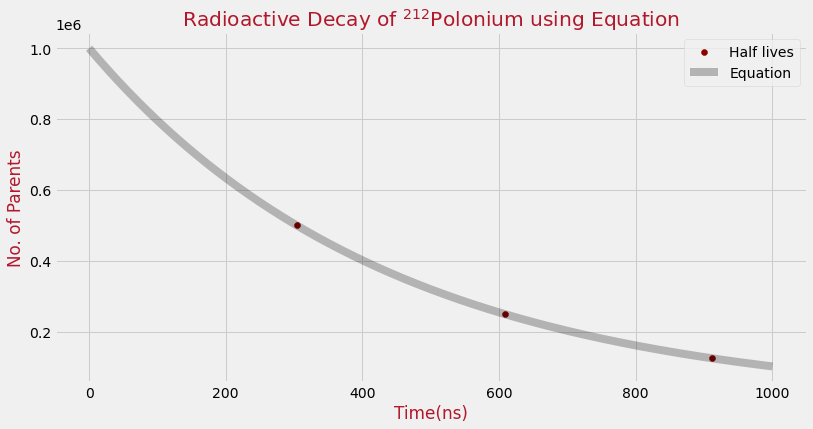

In [57]:
N0 = 1E6


#----------------------- Data for half-lives ---------------------#
half_life_times = np.array([1, 2, 3]) * polonium_half_life_ns
# Gives (0.5, 0.25, 0.125) * N0
half_life_levels = N0*(.5**np.array([1, 2, 3])) 

#---------------------------- Plotting ---------------------------#

fig, ax = plt.subplots()
ax.scatter(half_life_times, half_life_levels,
            color="darkred", label="Half lives")

plot_EQUATION_data_for_polonium(ax,
                               N0=N0,
                               total_time_ns=1000)

ax.set_xlabel("Time(ns)")
ax.set_ylabel("No. of Parents")
ax.set_title("Radioactive Decay of $^{212}$Polonium using Equation")
ax.legend()
plt.show()

## Radioactivity and Randomness

Radioactivity is one of the most purest random processes in nature. But what does this mean? 

If you take a radioactive sample, each parent has a fixed probability ($p$) of decaying in the time interval $\Delta t$ to follow. However, we can never know which parents will decay. That choice is purely random! 

So, how does such a random process lead to such a elegant equation like equation (1)? 

Let’s find out by simulating this process.

### Simulating Radioactive decay

- To get started lets take the fixed probability $p$ to be $1/6$. I.e. every parent has a probability of $p=\dfrac{1}{6}$ of decaying in the time interval ($\Delta t$) we are thinking. 
  Let's not worry about the exact value $1/6$ for the moment. We will discuss this later.
- What this means is that between time $t$ and $t+\Delta t$ we will lose $
  \dfrac{1}{6}$ of the parents. But how are we going to simulate which nuclei disintegrate? Easy!
- We assign a random number to each nuclei, and those who get a value less that $\dfrac{1}{6}$ is removed. This works because the PRNG is uniformly distributed and $\dfrac{1}{6}$ of the values are less than $\dfrac{1}{6}$.

Let's put this into code!

In [ ]:
def simulate_radioactivity(N0, no_of_time_intervals, probability):
    '''
    This function simulates the radioactive decay of a sample over
    a number of given time intervals.
    '''
    no_of_parents = [N0]
    time = [0]

    for i in range(no_of_time_intervals):
        # At the start of the interval
        current_no_of_parents = int(no_of_parents[-1])

        random_numbers = np.random.rand(current_no_of_parents)

        no_of_disintegations = np.sum(random_numbers < probability)
        new_no_of_parents = current_no_of_parents - no_of_disintegations

        no_of_parents.extend([new_no_of_parents])
        time.extend([i+1])

    return time, no_of_parents

Since we will need to plot our data, let's abstract it into a function so that we can reuse it when we need to.

In [36]:
def plot_simulated_data(ax, N0, no_of_time_intervals, probability):
    """
    A function we can reuse to plot the simulated data
    """
    simulated_time_as_index, simulated_data = simulate_radioactivity(N0,
                                                                     no_of_time_intervals,
                                                                     probability=probability)
    ax.plot(simulated_time_as_index, simulated_data,
             color='darkred', alpha=.5)
    ax.scatter(simulated_time_as_index, simulated_data,
                color='darkred', alpha=.75)

Time to plot!

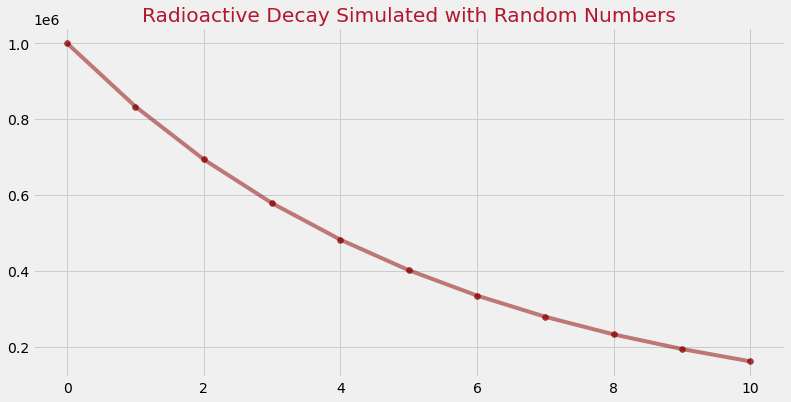

In [37]:
fig, ax = plt.subplots()
plot_simulated_data(ax=ax,
                    N0=1E6,
                    no_of_time_intervals=10,
                    probability=1/6.)
plt.title("Radioactive Decay Simulated with Random Numbers")
plt.show()

Great! Our simulation with random numbers shows the same behaviour as the equation differential equation! Let's see how close the agreement is by adjusting our random model to simulate Polonium. 

## Comparing Equation & Random Model for Po

First we need to determine the $p$ for Polonium. We can get an idea for how $p$ and $\lambda$ are related by rewriting the previous differential equation as follows:
$$
\begin{align*}
\dfrac{dN}{dt} &= -\lambda\, N \\ 
\Rightarrow \dfrac{\Delta N}{\Delta t} &\approx -\lambda\, N \\
\text{i.e.}\qquad \dfrac{\Delta N}{N} &\approx -\lambda\, \Delta t\\
\Rightarrow  \dfrac{|\Delta N|}{N} = p &\approx \lambda\, \Delta t\\
\end{align*}
$$
So we can get the probability for disintegration in the time interval $\Delta t$ simply as:
$$
p = \lambda\, \Delta t
$$

Notice that this approximation is better if the time interval $\Delta t$ is small.

Let's put this into code!

The first thing we need to do is to update `plot_simulated_data` to deal with real time (and not indices). 

Let's write it to look like `plot_equation_data_for_polonium` as follows

In [47]:
def plot_SIMULATED_data_for_polonium(ax, N0, total_time_ns, delta_t_ns):
    """
    A function we can reuse to plot the simulated data for Polonium
    """
    no_of_time_intervals = int(total_time_ns/delta_t_ns)

    # Probability for decaying in the interval delta_t
    p = polonium_decay_constant_in_per_s*(delta_t_ns*ns_to_s)
    
    simulated_time_as_index, simulated_data = simulate_radioactivity(N0,
                                                                 no_of_time_intervals,
                                                                 probability=p)
    simulated_time_ns = delta_t_ns*np.array(simulated_time_as_index)
    
    ax.plot(simulated_time_ns, simulated_data,
             color='darkred', alpha=.5, label="Simulated")
    ax.scatter(simulated_time_ns, simulated_data,
                color='darkred', alpha=.75)

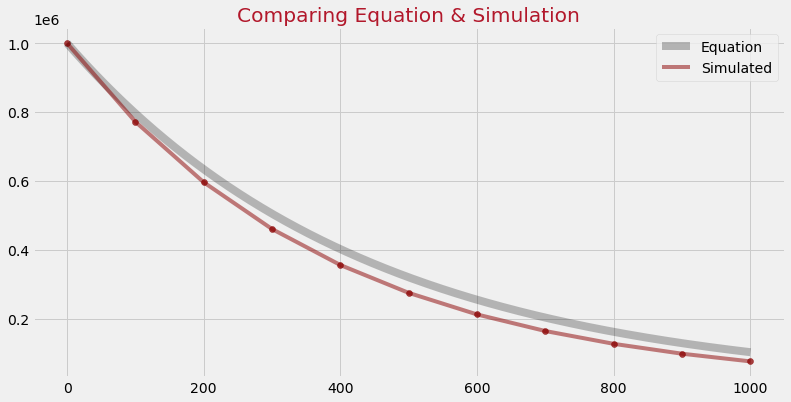

In [58]:
total_time_ns = 1000
delta_t_ns = 100
N0 = 1E6

fig, ax = plt.subplots()

plot_EQUATION_data_for_polonium(ax=ax,
                                N0=N0,
                                total_time_ns=total_time_ns)

plot_SIMULATED_data_for_polonium(ax=ax,
                                 N0=N0,
                                 total_time_ns=total_time_ns,
                                 delta_t_ns=delta_t_ns)

ax.set_title("Comparing Equation & Simulation")
ax.legend()
plt.show()

There seems to be a mismatch. This could be because our time interval is too large. Let's try some smaller time intervals. However,instead of using arbitrary time intervals, let's consider fractions of the half-life so that we some sense of scale.

### Compare models for various $\Delta t$

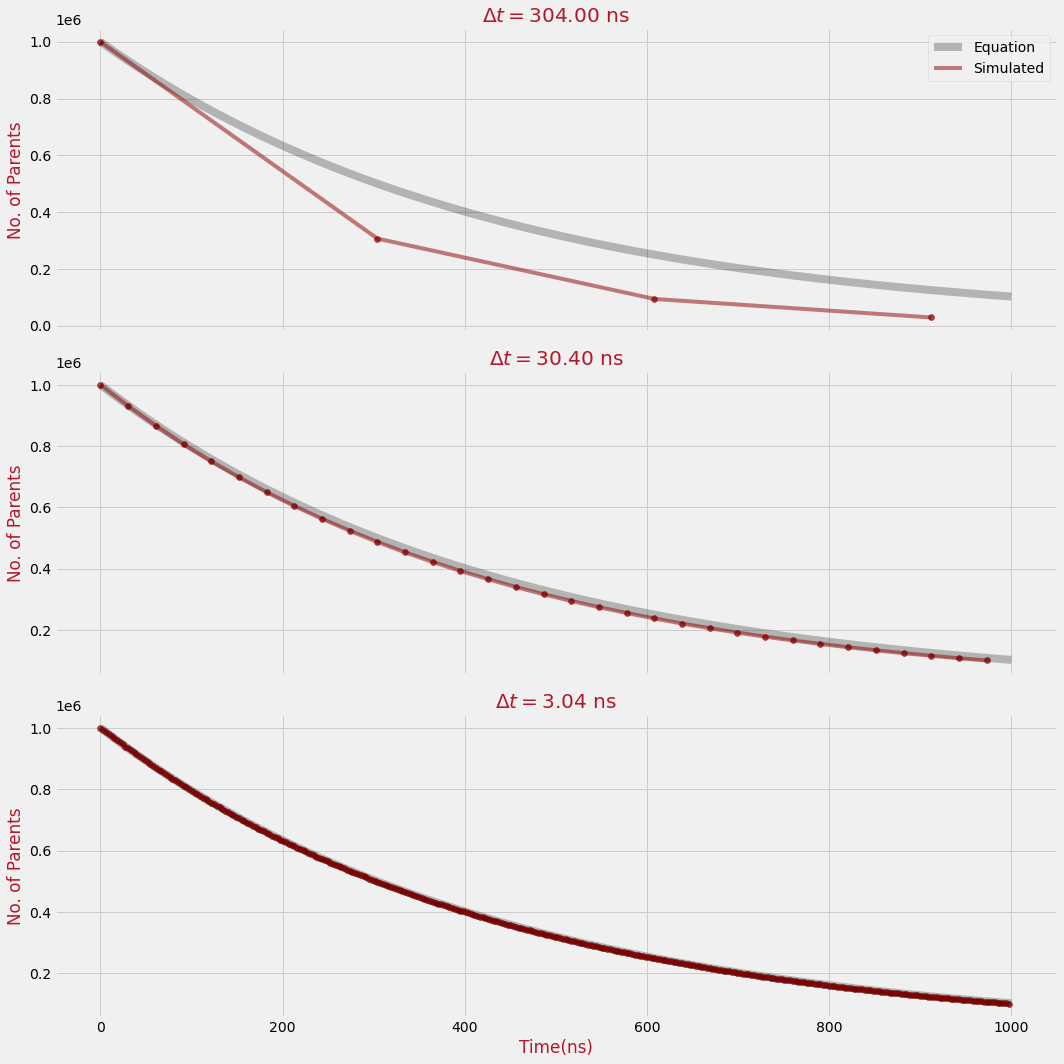

In [73]:
delta_t_ns_values = polonium_half_life_ns*np.array([1, 1/10., 1/100.])

fig, ax = plt.subplots(nrows=3, ncols=1,
                       figsize=(15, 15), sharex=True)

for i, delta_t_ns in enumerate(delta_t_ns_values):
    axis = ax[i]
    plot_EQUATION_data_for_polonium(ax=axis,
                                    N0=N0,
                                    total_time_ns=total_time_ns)

    plot_SIMULATED_data_for_polonium(ax=axis,
                                     N0=N0,
                                     total_time_ns=total_time_ns,
                                     delta_t_ns=delta_t_ns)

    axis.set_title(
        rf"$\Delta t = {delta_t_ns:.2f}$ ns")
    axis.set_ylabel("No. of Parents")

ax[0].legend()
ax[-1].set_xlabel("Time(ns)")

plt.tight_layout()

So, time interval ($\Delta t$) of about one-hundredth of the half-life seems to give identical results!

## Conclusion

In conclusion, we have shown that we can use pseudo-random numbers from a computer to simulate the real random phenomenon of Radioactive Decay. We also adjusted our simulation model to use the decay constant for an element (Polonium in our case) to give identical results to the exponential decay equation. The simulation and equation start to show good agreement when the simulation's time-interval is about one-hundredth of the half-life.